In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import json
from Cards import *


In [2]:
id_to_card = { 
    0: LumberYard(),
    1: StonePit(),
    2: ClayPool(),
    3: OreVein(),
    4: TreeFarm(),
    5: Excavation(),
    6: ClayPit(),
    7: TimberYard(),
    8: ForestCave(),
    9: Mine(),
    10: Glassworks(),
    11: Press(),
    12: Loom(),
    13: Pawnshop(),
    14: Baths(),
    15: Altar(),
    16: Theatre(),
    17: Tavern(),
    18: EastTradingPost(),
    19: WestTradingPost(),
    20: Marketplace(),
    21: Stockade(),
    22: Barracks(),
    23: GuardTower(),
    24: Apothecary(),
    25: Workshop(),
    26: Scriptorium(),
    27: Sawmill(),
    28: Quarry(),
    29: Brickyard(),
    30: Foundry(),
    31: Aqueduct(),
    32: Temple(),
    33: Statue(),
    34: Courthouse(),
    35: Forum(),
    36: Caravansery(),
    37: Vineyard(0),
    38: Bazar(0),
    39: Walls(),
    40: TrainingGround(),
    41: Stables(),
    42: ArcheryRange(),
    43: Dispensary(),
    44: Laboratory(),
    45: Library(),
    46: School(),
    47: Pantheon(),
    48: Gardens(),
    49: TownHall(),
    50: Palace(),
    51: Senate(),
    52: Haven(),
    53: Lighthouse(),
    54: ChamberOfCommerce(),
    55: Arena(),
    56: Fortifications(),
    57: Circus(),
    58: Arsenal(),
    59: SiegeWorkshop(),
    60: Lodge(),
    61: Observatory(),
    62: University(),
    63: Academy(),
    64: Study(),
    65: WorkersGuild(),
    66: CraftmensGuild(),
    67: TradersGuild(),
    68: PhilosophersGuild(),
    69: SpiesGuild(),
    70: StrategistsGuild(),
    71: ShipownersGuild(),
    72: ScientistsGuild(),
    73: MagistratesGuild(),
    74: BuildersGuild()
}

id_to_wonder = {
    0: "Ephesos",
    1: "Babylon",
    2: "Gizah",
    3: " Halikarnassos",
    4: "Alexandria",
    5: "Rhodos"
}


# Read all files in the directory

In [3]:
game_results = pd.DataFrame(columns= ["game_id","player","win","wonder","stages_played","tableau","color_count","points"])





def append_game_results(player,input, game_results):
    game_id = len(game_results)//3
    if player == "all":
        game_results.loc[len(game_results.index)] =  rowify(input["Jakob"],game_id,0)
        game_results.loc[len(game_results.index)] = rowify(input["Dara"],game_id,1)
        game_results.loc[len(game_results.index)] = rowify(input["Nicholas"],game_id,2)
    else:
        game_results.loc[len(game_results.index)] = rowify(input[player],game_id,0)
    return game_results
    

def rowify(dict,game_id, player):
    return [game_id,player, dict["win"],dict["wonder"],dict["stages_played"],dict["tableau"],dict["color_count"],dict["points"]]

def keep_winners_only(games, run=False):
    if run:
        return games[games["win"] == 1]
    return games

def keep_wonder_only(games,wonder=0, run=False):
    if run:
        return games[games["wonder"] == wonder]
    return games



In [4]:
def fetch_results(folder_name, player = "all"):
    game_results = pd.DataFrame(columns= ["game_id","player","win","wonder","stages_played","tableau","color_count","points"])
    for filename in os.listdir('./results/'+folder_name):
        if filename.endswith('.json'):
            with open("./results/"+folder_name+"/"+filename, 'r') as file:
                data_list = json.load(file)
                game_results = append_game_results(player,data_list, game_results)
    return game_results

In [5]:
one_games = fetch_results("1v1v1_10000", player = "all")
two_games = fetch_results("2v2v2_10000", player = "all")
three_games = fetch_results("3_medium_green_10000", player = "all")
versus_games = fetch_results("1v2v3_10000", player = "all")

In [6]:
games = one_games


In [7]:
games_winners = keep_winners_only(games,False)
games_Ephesos = keep_wonder_only(games, 0, True)
games_Babylon = keep_wonder_only(games, 1, True)
games_Gizah = keep_wonder_only(games, 2, True)
games_Halikarnassos = keep_wonder_only(games, 3, True)
games_Alexandria = keep_wonder_only(games, 4, True)
games_Rhodos = keep_wonder_only(games, 5, True)

In [8]:
games

,game_id,player,win,wonder,stages_played,tableau,color_count,points
0,0,0,1,3,2,"[18, 6, 14, 0, 2, 42, 31, 27, 29, 15, 10, 49, ...","{'brown': 5, 'grey': 1, 'red': 1, 'yellow': 2,...","{'VPRed': -2, 'VPGold': 7, 'VPWonder': 3, 'VPB..."
1,0,1,0,1,3,"[7, 21, 3, 10, 12, 35, 28, 36, 47, 51, 50, 56,...","{'brown': 3, 'grey': 2, 'red': 3, 'yellow': 2,...","{'VPRed': 8, 'VPGold': 5, 'VPWonder': 3, 'VPBl..."
2,0,2,0,2,3,"[23, 19, 22, 1, 41, 39, 37, 32, 53, 73, 55]","{'brown': 1, 'grey': 0, 'red': 4, 'yellow': 4,...","{'VPRed': 12, 'VPGold': 2, 'VPWonder': 13, 'VP..."
3,1,0,0,4,3,"[0, 21, 19, 2, 42, 29, 31, 10, 59, 51, 55, 66]","{'brown': 3, 'grey': 1, 'red': 3, 'yellow': 2,...","{'VPRed': 2, 'VPGold': 1, 'VPWonder': 10, 'VPB..."
4,1,1,0,1,3,"[23, 1, 22, 18, 12, 41, 28, 35, 32, 50, 47, 48...","{'brown': 2, 'grey': 1, 'red': 3, 'yellow': 3,...","{'VPRed': 3, 'VPGold': 7, 'VPWonder': 3, 'VPBl..."
...,...,...,...,...,...,...,...,...
29995,9998,1,0,3,3,"[7, 21, 23, 0, 41, 28, 29, 15, 27, 34, 73, 55,...","{'brown': 5, 'grey': 1, 'red': 4, 'yellow': 1,...","{'VPRed': 8, 'VPGold': 1, 'VPWonder': 3, 'VPBl..."
29996,9998,2,0,4,3,"[1, 6, 14, 18, 36, 31, 32, 37, 50, 49, 71, 53,...","{'brown': 2, 'grey': 0, 'red': 0, 'yellow': 5,...","{'VPRed': -6, 'VPGold': 7, 'VPWonder': 10, 'VP..."
29997,9999,0,0,4,3,"[3, 22, 18, 10, 2, 39, 35, 31, 32, 56, 69, 58,...","{'brown': 2, 'grey': 1, 'red': 4, 'yellow': 2,...","{'VPRed': 10, 'VPGold': 2, 'VPWonder': 7, 'VPB..."
29998,9999,1,1,2,3,"[6, 23, 0, 14, 42, 36, 29, 65, 50, 55, 59, 53]","{'brown': 3, 'grey': 0, 'red': 3, 'yellow': 3,...","{'VPRed': 4, 'VPGold': 5, 'VPWonder': 15, 'VPB..."


# Stats

In [9]:
colors_scheme = ["sienna","silver","orangered","gold","forestgreen","royalblue","rebeccapurple"]
color_to_scheme = 0

In [10]:
for row in game_results.iterrows():
    print(row[1])
    break

### Cards used

60

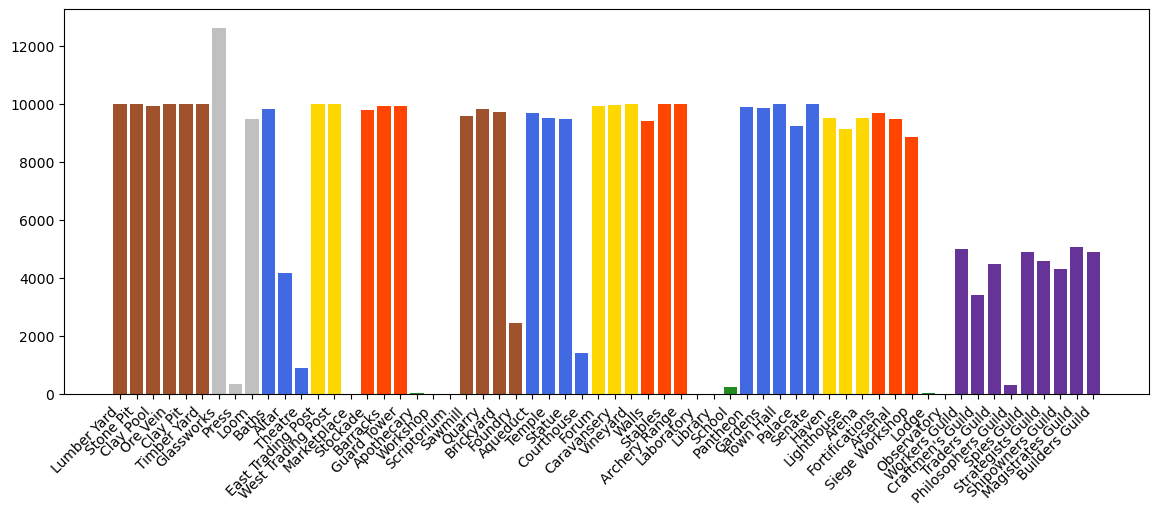

In [11]:
card_color_to_scheme = {"brown":"sienna","grey":"silver","red":"orangered","yellow":"gold","green":"forestgreen","blue":"royalblue","purple":"rebeccapurple"}

cards_used = []
for row in games.iterrows():
    cards_used+=row[1]["tableau"]

card_names, card_used = np.unique(cards_used,return_counts=True)

cards_color = [card_color_to_scheme[id_to_card[card].color] for card in card_names]
card_names = [id_to_card[card].name for card in card_names]


fig = plt.figure(figsize=(14,5));
plt.bar(card_names, card_used,color=cards_color);
plt.xticks(rotation=45, ha='right');
len(card_names)


### Cards used per card type

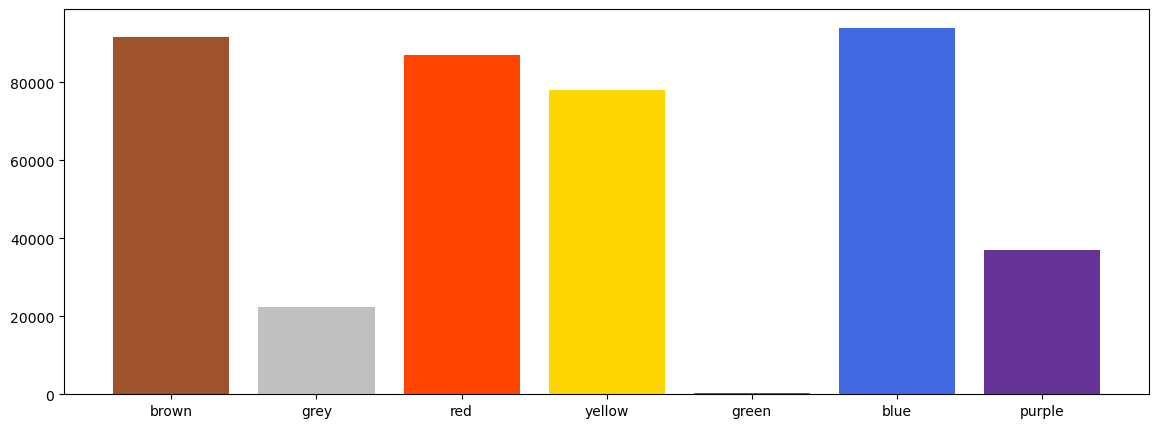

In [12]:
colors_used = {"brown":0,
              "grey":0,
              "red":0,
              "yellow":0,
              "green":0,
              "blue":0,
              "purple":0}

for row in games.iterrows():
    color_count = row[1]["color_count"]
    for color,count in color_count.items():
        colors_used[color] += count

fig = plt.figure(figsize=(14,5));
plt.bar(colors_used.keys(), colors_used.values(),color=colors_scheme);

### Points earned by type

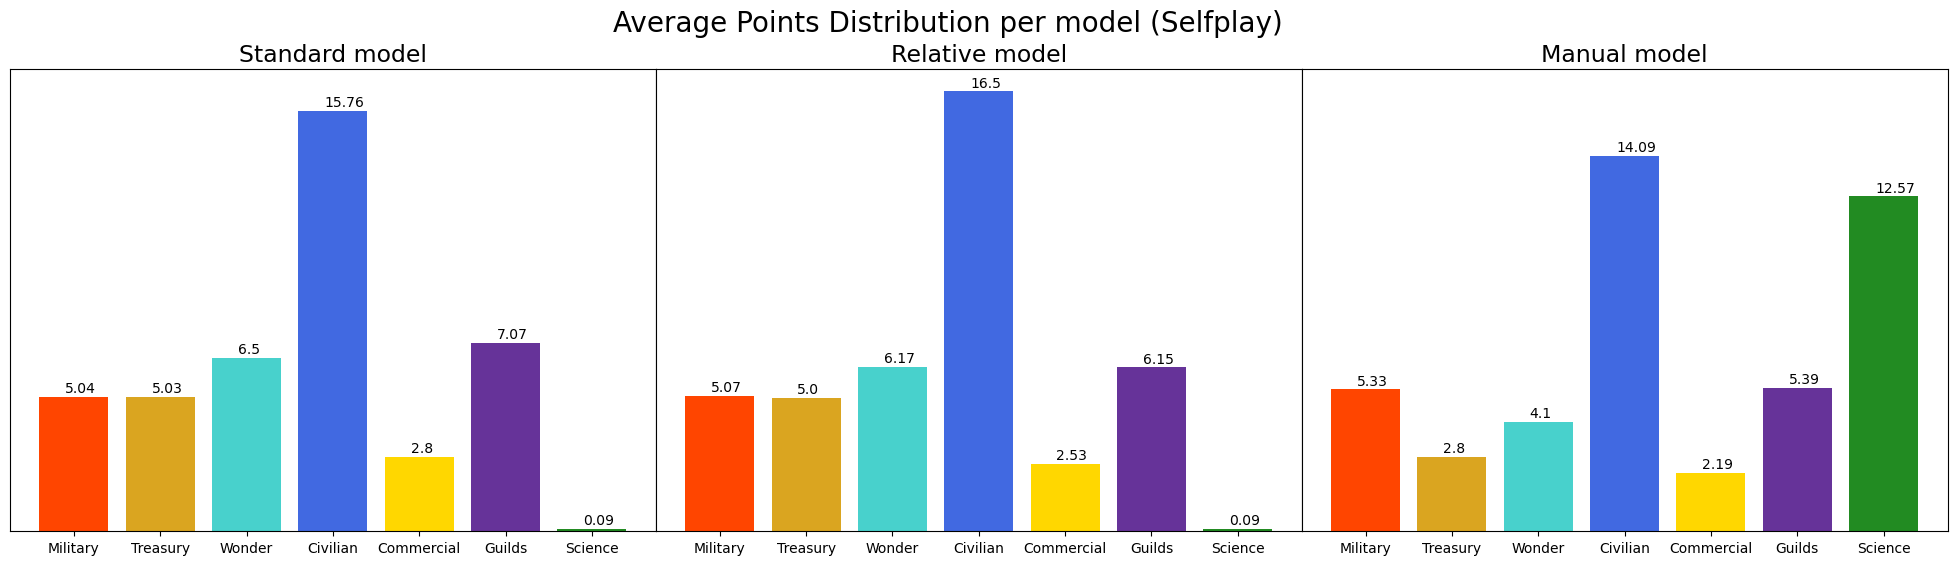

In [35]:
points_color_scheme = ["orangered","goldenrod","mediumturquoise","royalblue","gold","rebeccapurple","forestgreen"]

points_earned = {
              "VPRed":0,
              "VPGold":0,
              "VPWonder":0,
              "VPBlue":0,
              "VPYellow":0,
              "VPPurple":0,
              "VPGreen":0}

for row in games.iterrows():
    points = row[1]["points"]
    for ptype,count in points.items():
        if ptype != "total":
            points_earned[ptype] += count



fig, ax = plt.subplots(1,3,figsize=(25,6),sharey=True);
fig.suptitle("Average Points Distribution per model (Selfplay)", fontsize = 20)
ax[0].bar(["Military","Treasury","Wonder","Civilian","Commercial","Guilds","Science"], points_earned.values(),color=points_color_scheme);
ax[0].set_title("Standard model", fontsize = 17)
total = 0
for i, count in enumerate(points_earned.values()):
    ax[0].text(i-0.1,count+5000,str(round(count/30000,2)));
    total += count
ax[0].get_yaxis().set_visible(False)

points_earned = {
              "VPRed":0,
              "VPGold":0,
              "VPWonder":0,
              "VPBlue":0,
              "VPYellow":0,
              "VPPurple":0,
              "VPGreen":0}

for row in two_games.iterrows():
    points = row[1]["points"]
    for ptype,count in points.items():
        if ptype != "total":
            points_earned[ptype] += count

for i, count in enumerate(points_earned.values()):
    ax[1].text(i-0.1,count+5000,str(round(count/30000,2)));
    total += count

ax[1].bar(["Military","Treasury","Wonder","Civilian","Commercial","Guilds","Science"], points_earned.values(),color=points_color_scheme);
ax[1].set_title("Relative model", fontsize = 17)
ax[1].get_yaxis().set_visible(False)
total = 0

points_earned = {
              "VPRed":0,
              "VPGold":0,
              "VPWonder":0,
              "VPBlue":0,
              "VPYellow":0,
              "VPPurple":0,
              "VPGreen":0}

for row in three_games.iterrows():
    points = row[1]["points"]
    for ptype,count in points.items():
        if ptype != "total":
            points_earned[ptype] += count

for i, count in enumerate(points_earned.values()):
    ax[2].text(i-0.1,count+5000,str(round(count/30000,2)));
    total += count

ax[2].bar(["Military","Treasury","Wonder","Civilian","Commercial","Guilds","Science"], points_earned.values(),color=points_color_scheme);
ax[2].set_title("Manual model", fontsize = 17)
ax[2].get_yaxis().set_visible(False)
plt.subplots_adjust(wspace=0, hspace=0)



### Points distribution per card

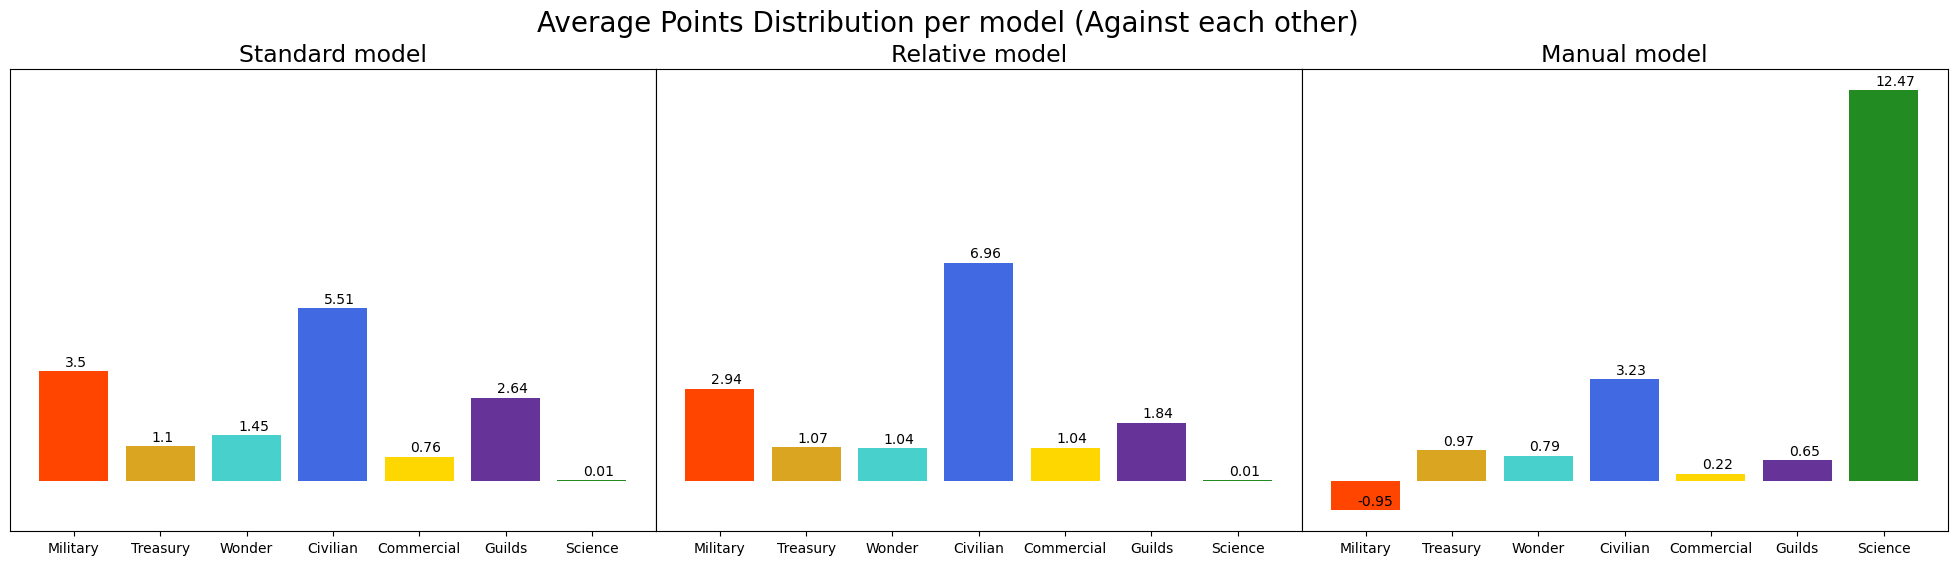

In [46]:
points_earned = [{"VPRed":0,"VPGold":0,"VPWonder":0,"VPBlue":0,"VPYellow":0,"VPPurple":0,"VPGreen":0},
                 {"VPRed":0,"VPGold":0,"VPWonder":0,"VPBlue":0,"VPYellow":0,"VPPurple":0,"VPGreen":0},
                 {"VPRed":0,"VPGold":0,"VPWonder":0,"VPBlue":0,"VPYellow":0,"VPPurple":0,"VPGreen":0}]
models = ["Standard model","Relative model","Manual model"]

for row in versus_games.iterrows():
    points = row[1]["points"]
    for ptype,count in points.items():
        if ptype != "total":
            points_earned[row[1]['player']][ptype] += count

fig, axes = plt.subplots(1,3,figsize=(25,6),sharey=True);
fig.suptitle("Average Points Distribution per model (Against each other)", fontsize = 20)



for i,ax in enumerate(axes):
    ax.bar(["Military","Treasury","Wonder","Civilian","Commercial","Guilds","Science"], points_earned[i].values(),color=points_color_scheme);
    ax.set_title(models[i], fontsize = 17)
    total = 0
    for j, count in enumerate(points_earned[i].values()):
        ax.text(j-0.1,count+5000,str(round(count/30000,2)));
        total += count
    ax.get_yaxis().set_visible(False)
    
plt.subplots_adjust(wspace=0, hspace=0)


In [19]:

points_per_card = np.zeros(75)
games_per_card = np.zeros(75)
cards_color =  [""]*75
card_names =  [""]*75
win_per_card =  np.zeros(75)

for row in games.iterrows():
    points = row[1]["points"]["total"]
    cards_used = row[1]["tableau"]
    for i in range(75):
        if i in cards_used:
            points_per_card[i] += points
            games_per_card[i] += 1
            cards_color[i] = id_to_card[i].color
            card_names[i] = id_to_card[i].name
            if row[1]["win"] == 1:
                win_per_card[i] += 1

mask = games_per_card != 0
games_per_card = games_per_card[mask]
points_per_card = points_per_card[mask]

masked_cards_color = np.array(cards_color)[mask]
masked_card_names = np.array(card_names)[mask]
win_per_card = win_per_card[mask]

avg_points_per_card = points_per_card/games_per_card
win_rate_per_card = win_per_card/games_per_card

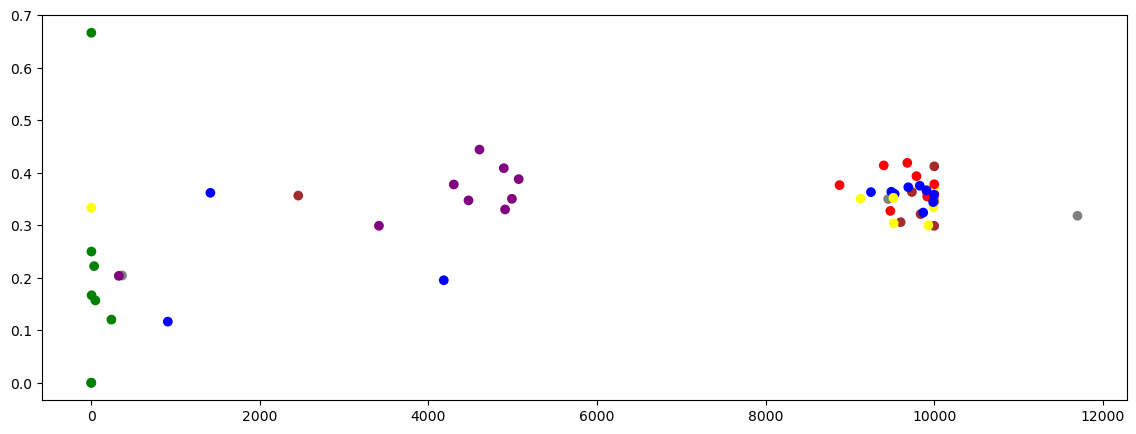

In [20]:
fig = plt.figure(figsize=(14,5));
ax = fig.add_subplot(111);
ax.scatter(games_per_card,win_rate_per_card,c=masked_cards_color)


with open("analysis_files/win_rate_per_card.csv", "w") as outfile:
    outfile.write("name,type,win_rate,gamesplayed\n")
    for i in range(len(win_rate_per_card)):
        outfile.write(card_names[i]+","+cards_color[i]+","+str(win_rate_per_card[i])+","+str(games_per_card[i])+"\n")


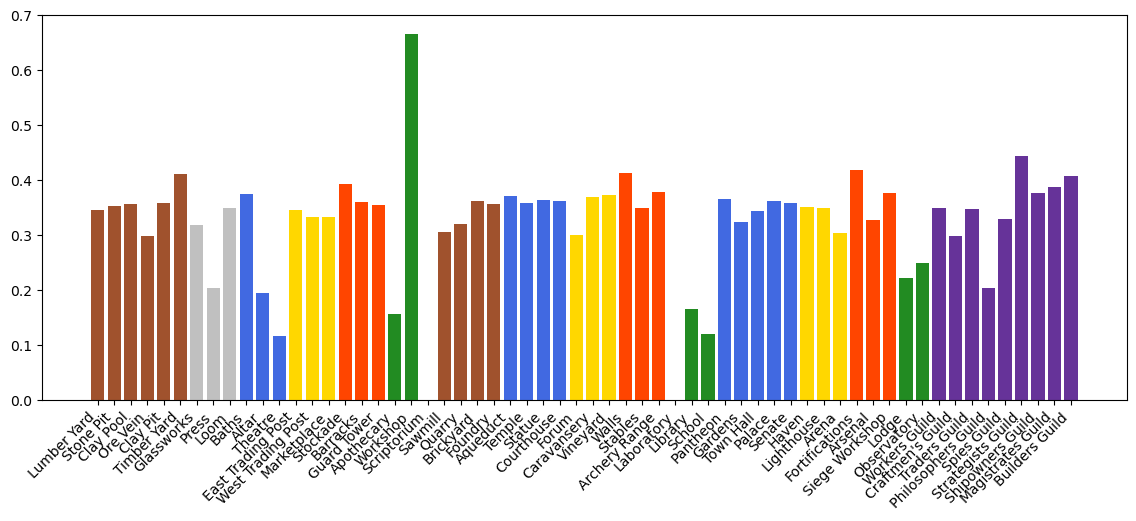

In [21]:
fig = plt.figure(figsize=(14,5));

plt.bar(masked_card_names,win_rate_per_card,color=[card_color_to_scheme[color] for color in masked_cards_color])
plt.xticks(rotation=45, ha='right');

# Wonders

In [22]:
wins = np.zeros(6)
games_played = np.zeros(6)
for row in games.iterrows():
    games_played[row[1]["wonder"]]+=1
    if row[1]["win"] == 1:
        wins[row[1]["wonder"]]+=1
   
win_rate = wins/games_played

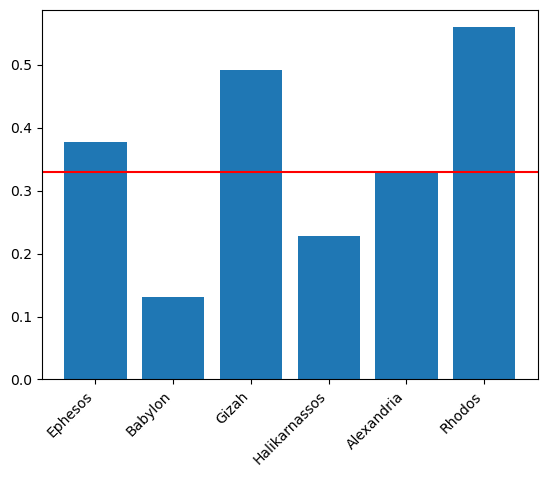

In [23]:
plt.bar(["Ephesos","Babylon","Gizah","Halikarnassos","Alexandria","Rhodos"],win_rate)
plt.axline((0,0.33),(5,0.33),c="red")
plt.xticks(rotation=45, ha='right');

array([  177.,  1875., 11123., 16436.,   389.])

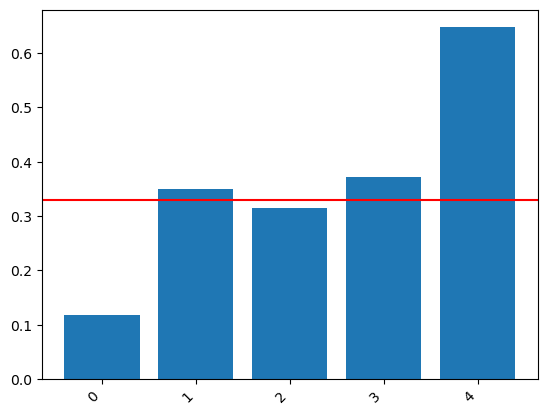

In [24]:
wins = np.zeros(5)
games_played = np.zeros(5)
for row in games.iterrows():
    games_played[row[1]["stages_played"]]+=1
    if row[1]["win"] == 1:
        wins[row[1]["stages_played"]]+=1
   
win_rate = wins/games_played


plt.bar([0,1,2,3,4],win_rate)
plt.axline((0,0.33),(4,0.33),c="red")
plt.xticks(rotation=45, ha='right');
games_played

# Discarded Cards

72

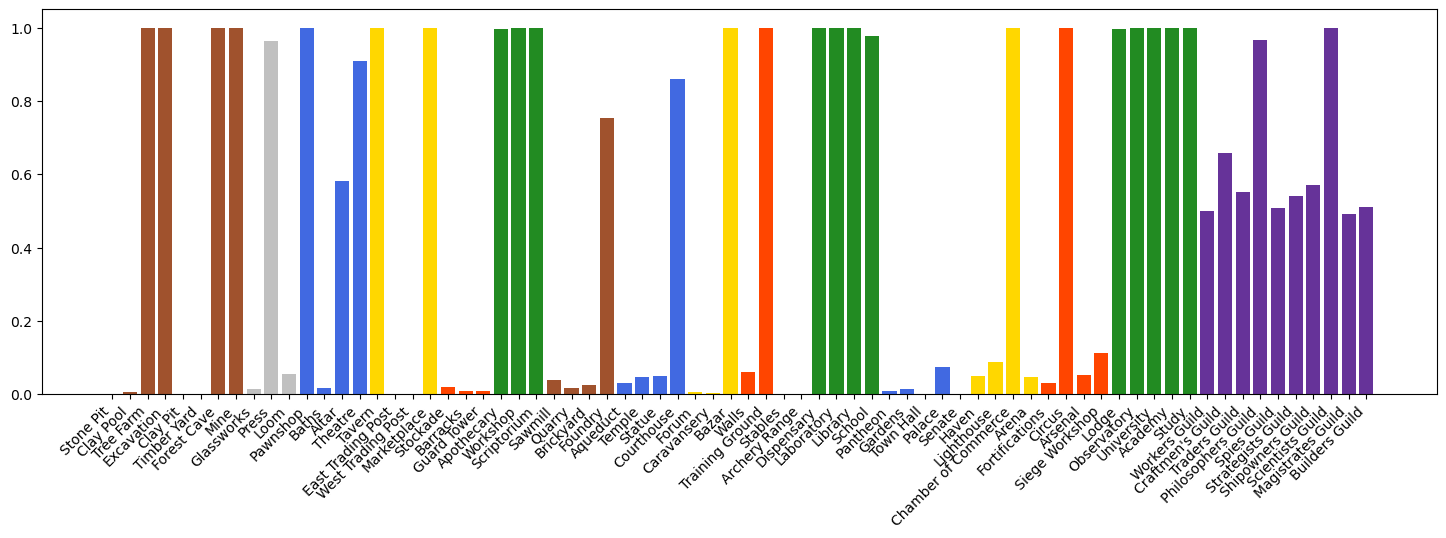

In [25]:
available_cards = set([i for i in range(75)])
discarded = np.zeros(len(available_cards))


all_cards = available_cards.copy()
for row in games.iterrows():
    
    cards_used = row[1]["tableau"]
    for card in cards_used:
        all_cards.discard(card)
    
    if row[1]["player"] == 2:
        for card in all_cards:
            cards_color[card] = id_to_card[card].color
            card_names[card] = id_to_card[card].name
            discarded[card] += 1
        all_cards = available_cards.copy()

mask = (discarded != 1)
discarded = discarded[mask]

masked_cards_color = np.array(cards_color)[mask]
masked_card_names = np.array(card_names)[mask]

discard_rate = discarded/10000

fig = plt.figure(figsize=(18,5));
plt.bar(masked_card_names,discard_rate,color=[card_color_to_scheme[color] for color in masked_cards_color])
plt.xticks(rotation=45, ha='right');
len(discarded)

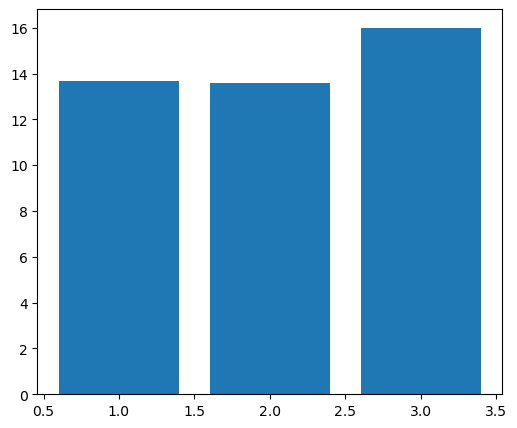

In [26]:
played = [sum(len(tableau) for tableau in one_games["tableau"])/30000,sum(len(tableau) for tableau in two_games["tableau"])/30000,sum(len(tableau) for tableau in three_games["tableau"])/30000]


fig = plt.figure(figsize=(6,5));
plt.bar([1,2,3],played);



In [27]:
points_from_gold = [sum([points["VPGold"] for points in one_games["points"]])/30000,sum(points["VPGold"] for points in two_games["points"])/30000,sum((points["VPGold"]) for points in three_games["points"])/30000]
points_from_gold

[5.0291, 5.002, 2.7989333333333333]

In [37]:
def keep_3rd_age(tableau):
    return [card for card in tableau if id_to_card[card].age == 3]

In [38]:

model_names= ["standard","relative","manual"]
game_lists = [one_games, two_games, three_games]





with open("analysis_files/prelim.csv", "w") as outfile:
    outfile.write("model,points,win,nb_cards_played,nb_card_3rd_age\n")
    for i in range(3):
        for j in range(10000):
            outfile.write(model_names[i]+","+str(game_lists[i].iloc[j]["points"]["total"])+","+str(game_lists[i].iloc[j]["win"])+","+str(len(game_lists[i].iloc[j]["tableau"]))+","+str(len(keep_3rd_age(game_lists[i].iloc[j]["tableau"])))+"\n")

In [47]:
def get_stats(data):
    # Calculate statistics
    mean = np.mean(data)
    std_dev = np.std(data)
    min_val = np.min(data)
    max_val = np.max(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)

    return [mean, std_dev, min_val, max_val, q1, q3]

get_stats([points['total'] for points in versus_games['points']])



[47.24933333333333, 8.248371529513502, 19, 88, 42.0, 52.0]

In [72]:
win_rates = [0]*3

for row in versus_games.iterrows():
    if row[1]['win'] == 1:
        win_rates[row[1]['player']] +=1

win_rates

[2010, 1902, 6546]

In [50]:
with open("analysis_files/versus.csv", "w") as outfile:
    outfile.write("model,points,win,nb_cards_played\n")
    for row in versus_games.iterrows():
        outfile.write(str(row[1]['player'])+","+str(row[1]['points']['total'])+","+str(row[1]['win'])+","+str(len(row[1]['tableau']))+"\n")

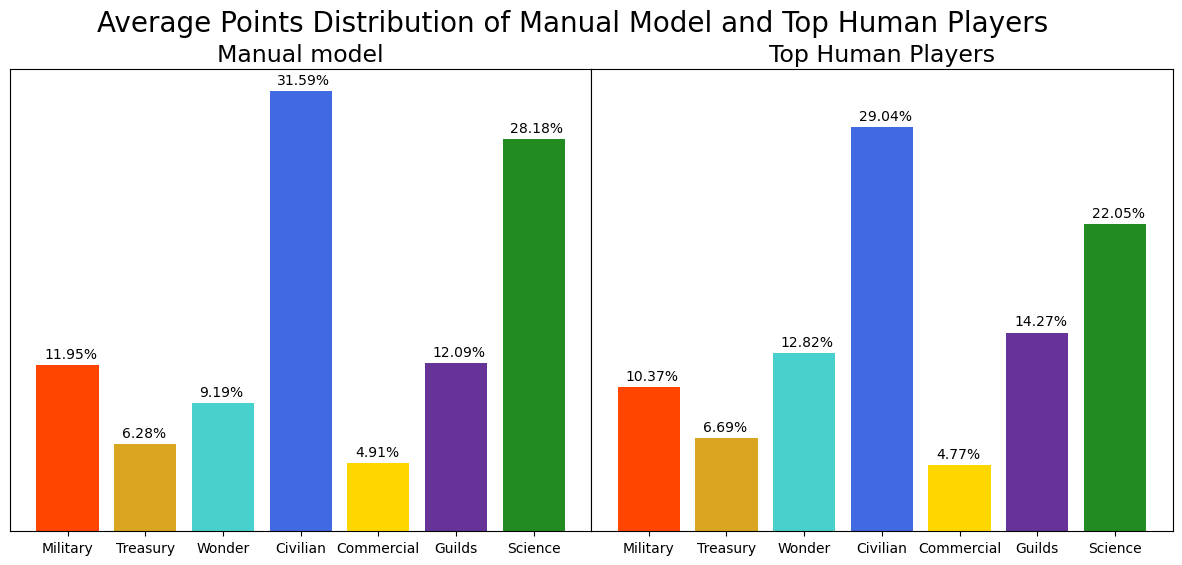

In [103]:
manual = [5.33/0.446,2.80/0.446,4.1/0.446,14.09/0.446,2.19/0.446,5.39/0.446,12.57/0.446]
pro = [5.58/0.5383,3.6/0.5383,6.9/0.5383,15.63/0.5383,2.57/0.5383,7.68/0.5383,11.87/0.5383]


fig, ax = plt.subplots(1,2,figsize=(15,6),sharey=True);
fig.suptitle("Average Points Percentage Distribution of Manual Model and Top Human Players", fontsize = 20)



ax[0].bar(["Military","Treasury","Wonder","Civilian","Commercial","Guilds","Science"], manual,color=points_color_scheme);
ax[0].set_title("Manual model", fontsize = 17)
ax[0].get_yaxis().set_visible(False)

ax[1].bar(["Military","Treasury","Wonder","Civilian","Commercial","Guilds","Science"], pro,color=points_color_scheme);
ax[1].set_title("Top Human Players", fontsize = 17)
ax[1].get_yaxis().set_visible(False)

for i in range(7):
    ax[0].text(i-0.3,manual[i]+0.5,str(round(manual[i],2))+"%");

for i in range(7):
    ax[1].text(i-0.3,pro[i]+0.5,str(round(pro[i],2))+"%");
    


plt.subplots_adjust(wspace=0, hspace=0)
#manual


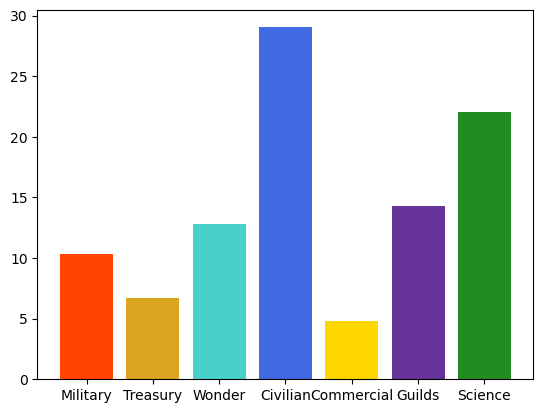

In [94]:

[5.33/0.446,2.80/0.446,4.1/0.446,14.09/0.446,2.19/0.446,5.39/0.446,12.57/0.446]
[5.58/0.5383,3.6/0.5383,6.9/0.5383,15.63/0.5383,2.57/0.5383,7.68/0.5383,11.87/0.5383]
plt.bar(["Military","Treasury","Wonder","Civilian","Commercial","Guilds","Science"], pro,color=points_color_scheme);